In this assignment, you are required to implement functions to calculate the listed performance measures below from scratch. YOU CAN USE NUMPY FOR CALCULATIONS AND MATPLOTLIB FOR VISUALIZATION. DON'T USE ANY OTHER PACKAGE.

* Accuracy
* Confusion matrix
* Percision
* Recall
* F1 score
* AUC of ROC

You're also required to implement functions to display the following

* Confusion matrix
* Percision VS Recall curve
* ROC curve

In [1]:
# DON'T CHANGE THIS
# DON'T 
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

y = np.random.randint(2, size=(100, 1))          # Generating random labels
y_predicted= np.random.uniform(0, 1, size=(100, 1))  # Generating random predictions

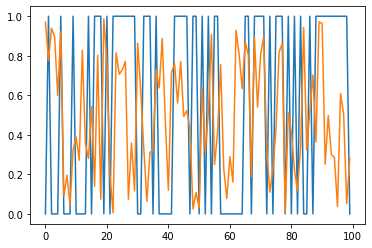

In [2]:
# DON'T CHANGE THIS
import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(y_predicted);

You can start your implementation below.

Accuracy 


[Convert NumPy array to 0 or 1 based on threshold](https://stackoverflow.com/questions/46214291/convert-numpy-array-to-0-or-1-based-on-threshold)

In [3]:
y_preds = np.where(y_predicted > 0.5, 1,0)

In [4]:
def accuracy(actual , predicted):
  return (actual==predicted).sum()/actual.shape[1]


In [5]:
accuracy(y,y_preds)

54.0

In [6]:
TP = ((y == 1) & (y_preds == 1)).sum()
print('True positive\n', TP)
TN = ((y == 0) & (y_preds == 0)).sum()
print('True negatives\n',TN)
FP = ((y == 0) & (y_preds == 1)).sum()
print('False positive\n',FP)
FN = ((y == 1) & (y_preds == 0)).sum()
print('False negatives\n',FN)

True positive
 29
True negatives
 25
False positive
 19
False negatives
 27


Percision

In [7]:
percision = TP / (TP+FP)
percision

0.6041666666666666

Recall

In [8]:
recall = TP / (TP + FN)
recall

0.5178571428571429

F1-score

In [9]:
f1_score = 2 * percision * recall / (percision + recall)
f1_score

0.5576923076923077

Confusion matrix

In [10]:
confusion_matrix = np.array([[TP,FP],
                             [FN,TN]])
confusion_matrix

array([[29, 19],
       [27, 25]])

The function returns the false positive rates( for each threshold, true positive rates for each threshold and thresholds.

##ROC Curve
[ROC curve stackquest](https://www.youtube.com/watch?v=4jRBRDbJemM&t=459s&ab_channel=StatQuestwithJoshStarmer)

[ROC curve towards datascience](https://towardsdatascience.com/roc-curve-and-auc-from-scratch-in-numpy-visualized-2612bb9459ab)

[Calulating AUC](https://stackoverflow.com/questions/13320262/calculating-the-area-under-a-curve-given-a-set-of-coordinates-without-knowing-t)

In [11]:
def roc(y,y_preds):
  tpr_list = []
  fpr_list = []
  threshold = np.linspace(0,1,num = 10)
  for i in range(len(threshold)):
    
    y_hat = np.where(y_preds > threshold[i], 1,0)

    TP = ((y == 1) & (y_hat == 1)).sum()
    TN = ((y == 0) & (y_hat == 0)).sum()
    FP = ((y == 0) & (y_hat == 1)).sum()
    FN = ((y == 1) & (y_hat == 0)).sum()

    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)
    tpr_list.append(tpr)
    fpr_list.append(fpr)
  plt.scatter(tpr_list,fpr_list,color = 'red')
  plt.plot(tpr_list,fpr_list, color = 'purple')
  plt.title('ROC curve')
  plt.ylabel('True positive rate')
  plt.xlabel('False positive rate')
  auc = np.trapz(fpr_list, dx=0.1)
  return auc

0.42727272727272725

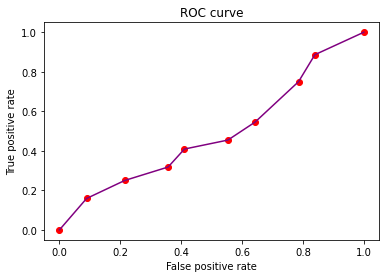

In [12]:
auc = roc(y, y_predicted)
auc

Percision vs Recall

[Percision vs Recall curve](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

In [13]:
def per_vs_rec(y,y_preds):
  per_list = []
  recall_list = []
  threshold = np.linspace(0,1,num = 10)
  for i in range(len(threshold)):
    
    y_hat = np.where(y_preds > threshold[i], 1,0)

    TP = ((y == 1) & (y_hat == 1)).sum()
    TN = ((y == 0) & (y_hat == 0)).sum()
    FP = ((y == 0) & (y_hat == 1)).sum()
    FN = ((y == 1) & (y_hat == 0)).sum()

    percision = TP / (TP+FP)
    recall = TP / (TP + FN)
    
    per_list.append(percision)
    recall_list.append(recall)
  plt.scatter(recall_list,per_list, color = 'red')
  plt.plot(recall_list,per_list, color = 'purple')
  plt.title('Percesion vs Recall')
  plt.xlabel('Recall')
  plt.ylabel('Percesion');



C:\Users\ABDELR~1\AppData\Local\Temp/ipykernel_13256/2671578604.py:14: RuntimeWarning: invalid value encountered in long_scalars
  percision = TP / (TP+FP)


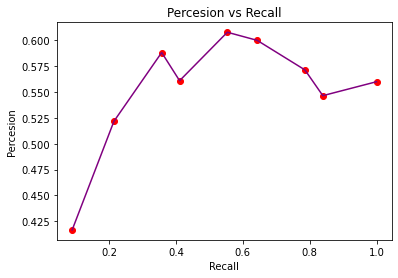

In [14]:
per_vs_rec(y,y_predicted);